In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [5]:
import numpy as np
import pandas as pd

In [6]:
tabella_iniziale_occ= pd.read_csv(r'C:\Users\Alice\OneDrive\Documenti\TECNOLOGIE\tasso_occupazione1.csv')
tabella_iniziale_occ

,ITTER107,Territorio,TIPO_DATO_FOL,Tipo dato,SEXISTAT1,Sesso,ETA1,Classe di età,TIME,Seleziona periodo,Value,Flag Codes,Flags
0,ITC1,Piemonte,EMP_R,tasso di occupazione,1,maschi,Y15-24,15-24 anni,2010,2010,26.830675,NaN,NaN
1,ITC1,Piemonte,EMP_R,tasso di occupazione,1,maschi,Y15-24,15-24 anni,2011,2011,27.706425,NaN,NaN
2,ITC1,Piemonte,EMP_R,tasso di occupazione,1,maschi,Y15-24,15-24 anni,2012,2012,26.633891,NaN,NaN
3,ITC1,Piemonte,EMP_R,tasso di occupazione,1,maschi,Y15-24,15-24 anni,2013,2013,21.571089,NaN,NaN
4,ITC1,Piemonte,EMP_R,tasso di occupazione,1,maschi,Y15-24,15-24 anni,2014,2014,20.204679,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,ITF4,Puglia,EMP_R,tasso di occupazione,2,femmine,Y15-24,15-24 anni,2015,2015,8.627377,NaN,NaN
1316,ITF4,Puglia,EMP_R,tasso di occupazione,2,femmine,Y15-24,15-24 anni,2016,2016,10.193790,NaN,NaN
1317,ITF4,Puglia,EMP_R,tasso di occupazione,2,femmine,Y15-24,15-24 anni,2017,2017,10.633209,NaN,NaN
1318,ITF4,Puglia,EMP_R,tasso di occupazione,2,femmine,Y15-24,15-24 anni,2018,2018,11.432762,NaN,NaN


In [7]:
tabella_iniziale_occ.isnull().sum()

ITTER107                0
Territorio              0
TIPO_DATO_FOL           0
Tipo dato               0
SEXISTAT1               0
Sesso                   0
ETA1                    0
Classe di età           0
TIME                    0
Seleziona periodo       0
Value                   0
Flag Codes           1320
Flags                1320
dtype: int64

In [8]:
tasso_occupazione_giovanile= pd.DataFrame(data=tabella_iniziale_occ, columns =['Territorio', 'SEXISTAT1', 'Sesso', 'Classe di età', 'Seleziona periodo', 'Value' ])
tasso_occupazione_giovanile

,Territorio,SEXISTAT1,Sesso,Classe di età,Seleziona periodo,Value
0,Piemonte,1,maschi,15-24 anni,2010,26.830675
1,Piemonte,1,maschi,15-24 anni,2011,27.706425
2,Piemonte,1,maschi,15-24 anni,2012,26.633891
3,Piemonte,1,maschi,15-24 anni,2013,21.571089
4,Piemonte,1,maschi,15-24 anni,2014,20.204679
...,...,...,...,...,...,...
1315,Puglia,2,femmine,15-24 anni,2015,8.627377
1316,Puglia,2,femmine,15-24 anni,2016,10.193790
1317,Puglia,2,femmine,15-24 anni,2017,10.633209
1318,Puglia,2,femmine,15-24 anni,2018,11.432762


In [9]:
Età=tasso_occupazione_giovanile.groupby(["Classe di età"]).count().reset_index()
Età["Classe di età"]

0    15-24 anni
1    25-34 anni
Name: Classe di età, dtype: object

In [10]:
#rinominiamo alcuni nomi di colonne per facilitarci
tasso_occupazione_giovanile.rename(columns={"Value": "Valori", "Seleziona periodo":"Anni", "Classe di età":"Età"},inplace=True) 
tasso_occupazione_giovanile

,Territorio,SEXISTAT1,Sesso,Età,Anni,Valori
0,Piemonte,1,maschi,15-24 anni,2010,26.830675
1,Piemonte,1,maschi,15-24 anni,2011,27.706425
2,Piemonte,1,maschi,15-24 anni,2012,26.633891
3,Piemonte,1,maschi,15-24 anni,2013,21.571089
4,Piemonte,1,maschi,15-24 anni,2014,20.204679
...,...,...,...,...,...,...
1315,Puglia,2,femmine,15-24 anni,2015,8.627377
1316,Puglia,2,femmine,15-24 anni,2016,10.193790
1317,Puglia,2,femmine,15-24 anni,2017,10.633209
1318,Puglia,2,femmine,15-24 anni,2018,11.432762


In [11]:
Territori=tasso_occupazione_giovanile.groupby(["Territorio"]).count().reset_index()
Territori["Territorio"]

0                                Abruzzo
1                             Basilicata
2                               Calabria
3                               Campania
4                         Emilia-Romagna
5                  Friuli-Venezia Giulia
6                                  Lazio
7                                Liguria
8                              Lombardia
9                                 Marche
10                                Molise
11                              Piemonte
12    Provincia Autonoma Bolzano / Bozen
13             Provincia Autonoma Trento
14                                Puglia
15                              Sardegna
16                               Sicilia
17                               Toscana
18        Trentino Alto Adige / Südtirol
19                                Umbria
20        Valle d'Aosta / Vallée d'Aoste
21                                Veneto
Name: Territorio, dtype: object

In [12]:
#TOG="tasso occupazione giovanile"
TOG_regioni=tasso_occupazione_giovanile[~tasso_occupazione_giovanile.Territorio.str.contains("Provincia")]
TOG_regioni

,Territorio,SEXISTAT1,Sesso,Età,Anni,Valori
0,Piemonte,1,maschi,15-24 anni,2010,26.830675
1,Piemonte,1,maschi,15-24 anni,2011,27.706425
2,Piemonte,1,maschi,15-24 anni,2012,26.633891
3,Piemonte,1,maschi,15-24 anni,2013,21.571089
4,Piemonte,1,maschi,15-24 anni,2014,20.204679
...,...,...,...,...,...,...
1315,Puglia,2,femmine,15-24 anni,2015,8.627377
1316,Puglia,2,femmine,15-24 anni,2016,10.193790
1317,Puglia,2,femmine,15-24 anni,2017,10.633209
1318,Puglia,2,femmine,15-24 anni,2018,11.432762


In [13]:
primo_data=TOG_regioni[['Territorio', 'Sesso', 'Valori', 'Età']]
primo_data

,Territorio,Sesso,Valori,Età
0,Piemonte,maschi,26.830675,15-24 anni
1,Piemonte,maschi,27.706425,15-24 anni
2,Piemonte,maschi,26.633891,15-24 anni
3,Piemonte,maschi,21.571089,15-24 anni
4,Piemonte,maschi,20.204679,15-24 anni
...,...,...,...,...
1315,Puglia,femmine,8.627377,15-24 anni
1316,Puglia,femmine,10.193790,15-24 anni
1317,Puglia,femmine,10.633209,15-24 anni
1318,Puglia,femmine,11.432762,15-24 anni


In [14]:
sesso_femmine=primo_data[primo_data.Sesso == "femmine"] 
sesso_femmine

,Territorio,Sesso,Valori,Età
10,Piemonte,femmine,21.691149,15-24 anni
11,Piemonte,femmine,21.090656,15-24 anni
12,Piemonte,femmine,19.578197,15-24 anni
13,Piemonte,femmine,15.452046,15-24 anni
14,Piemonte,femmine,16.106807,15-24 anni
...,...,...,...,...
1315,Puglia,femmine,8.627377,15-24 anni
1316,Puglia,femmine,10.193790,15-24 anni
1317,Puglia,femmine,10.633209,15-24 anni
1318,Puglia,femmine,11.432762,15-24 anni


In [15]:
sesso_maschi=primo_data[primo_data.Sesso == "maschi"] 
sesso_maschi

,Territorio,Sesso,Valori,Età
0,Piemonte,maschi,26.830675,15-24 anni
1,Piemonte,maschi,27.706425,15-24 anni
2,Piemonte,maschi,26.633891,15-24 anni
3,Piemonte,maschi,21.571089,15-24 anni
4,Piemonte,maschi,20.204679,15-24 anni
...,...,...,...,...
1265,Campania,maschi,12.978117,15-24 anni
1266,Campania,maschi,14.594548,15-24 anni
1267,Campania,maschi,14.120601,15-24 anni
1268,Campania,maschi,13.194163,15-24 anni


In [16]:
totale=primo_data[primo_data.Sesso == "totale"]
totale

,Territorio,Sesso,Valori,Età
20,Piemonte,totale,24.321255,15-24 anni
21,Piemonte,totale,24.479800,15-24 anni
22,Piemonte,totale,23.196776,15-24 anni
23,Piemonte,totale,18.593086,15-24 anni
24,Piemonte,totale,18.210225,15-24 anni
...,...,...,...,...
1275,Sicilia,totale,39.700859,25-34 anni
1276,Sicilia,totale,40.051565,25-34 anni
1277,Sicilia,totale,39.675758,25-34 anni
1278,Sicilia,totale,38.756915,25-34 anni


In [17]:
provapdef=totale.groupby(["Territorio", "Età"]).sum()
provapdef

Valori
Territorio                     Età                   
Abruzzo                        15-24 anni  158.337756
                               25-34 anni  603.807763
Basilicata                     15-24 anni  122.045340
                               25-34 anni  488.143381
Calabria                       15-24 anni  104.053241
                               25-34 anni  402.382948
Campania                       15-24 anni  111.460818
                               25-34 anni  401.488959
Emilia-Romagna                 15-24 anni  228.384688
                               25-34 anni  748.778111
Friuli-Venezia Giulia          15-24 anni  209.704730
                               25-34 anni  721.255197
Lazio                          15-24 anni  153.519892
                               25-34 anni  637.620277
Liguria                        15-24 anni  174.004983
                               25-34 anni  685.378427
Lombardia                      15-24 anni  224.369700
                               25-34 anni  770.966216
Marche                         15-24 anni  201.705914
                               25-34 anni  702.423494
Molise                         15-24 anni  128.373087
                               25-34 anni  509.925472
Piemonte                       15-24 anni  206.384744
                               25-34 anni  727.672955
Puglia                         15-24 anni  137.524763
                               25-34 anni  480.146439
Sardegna                       15-24 anni  142.989974
                               25-34 anni  515.905258
Sicilia                        15-24 anni  112.695829
                               25-34 anni  406.522783
Toscana                        15-24 anni  204.449984
                               25-34 anni  708.184249
Trentino Alto Adige / Südtirol 15-24 anni  303.863696
                               25-34 anni  785.724684
Umbria                         15-24 anni  194.163029
                               25-34 anni  689.701016
Valle d'Aosta / Vallée d'Aoste 15-24 anni  231.193863
                               25-34 anni  761.162014
Veneto                         15-24 anni  239.599557
                               25-34 anni  750.727922

In [18]:
Datistat = np.array(totale['Valori'])
print(Datistat)

[24.321255 24.4798   23.196776 18.593086 18.210225 18.321549 17.928468
 19.5121   20.733177 21.088308 27.871224 24.3015   26.003926 22.357651
 19.77156  22.156742 21.876366 21.35796  22.817923 22.679011 21.859494
 21.531792 20.839848 14.543502 14.713548 15.094746 16.037176 16.431824
 16.113003 16.84005  25.712274 24.551286 23.328886 21.542244 20.583654
 19.481693 20.297023 21.361463 23.210688 24.300489 33.082728 32.831026
 33.047041 29.223481 28.460534 26.348284 27.780671 28.987913 31.115916
 32.986102 27.739964 26.469296 25.006541 21.86489  21.925446 20.777751
 23.123267 23.969804 23.144251 25.578347 25.72758  23.415306 18.814246
 20.422103 20.39929  19.090272 20.074837 20.287878 19.632885 21.840333
 25.71318  24.457604 23.748951 19.423972 19.170632 20.568842 23.20958
 23.795954 23.661805 24.634168 22.343897 21.774076 21.296314 20.43689
 20.038937 19.165009 18.449324 20.587777 19.898131 20.459629 24.606355
 23.701861 21.091211 18.445006 16.026655 17.651017 17.715397 19.212233
 17.6909

In [19]:
#per vedere dati statistici posso utilizzare
print("Media giovani occupati: ", Datistat.mean())
print("Deviazione Standard: ", Datistat.std())
print("Valore minimo: ", Datistat.min())
print("Valore massimo: ", Datistat.max())
print("25 percentile: ", np.percentile(Datistat, 25))
print("Mediana Valori: ", np.median(Datistat))
print("75 percentile: ", np.percentile(Datistat, 75))

Media giovani occupati:  40.2168578825
Deviazione Standard:  24.554267465401068
Valore minimo:  7.688203
Valore massimo:  80.784056
25 percentile:  18.150696500000002
Mediana Valori:  34.4104265
75 percentile:  67.59947374999999


In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set(context='notebook', style='darkgrid', font='sans-serif', font_scale = 1)
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt

Text(0.5, 0, 'Valori')

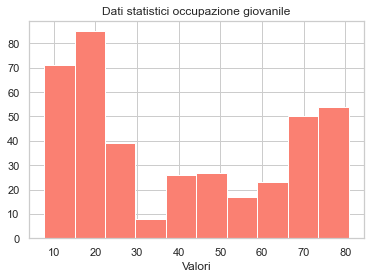

In [21]:
seaborn.set_style(style="whitegrid")
seaborn.set_palette(palette="dark:salmon_r")
plt.hist(Datistat)
plt.title('Dati statistici occupazione giovanile') #titolo del grafico
plt.xlabel('Valori') #nome asse x

In [22]:
sns.set_theme(style="darkgrid")

<Figure size 720x144 with 0 Axes>

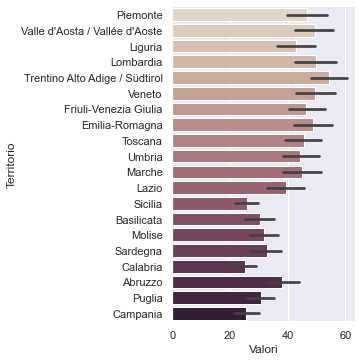

In [23]:
fig = plt.figure(figsize=(10,2))
sns.catplot(data=primo_data, x="Valori", y="Territorio", kind="bar", palette="ch:.25")

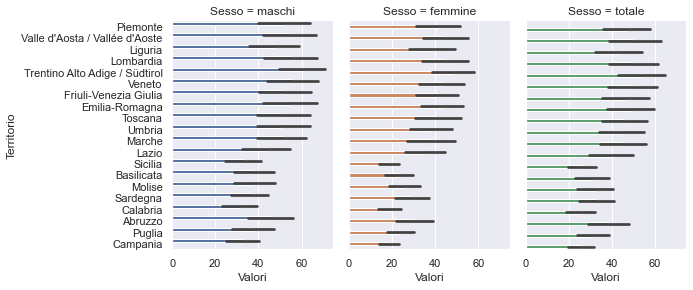

In [24]:
sns.catplot(data=primo_data, x="Valori", y="Territorio", hue="Sesso", col="Sesso",kind="bar",height=4, aspect=.8)

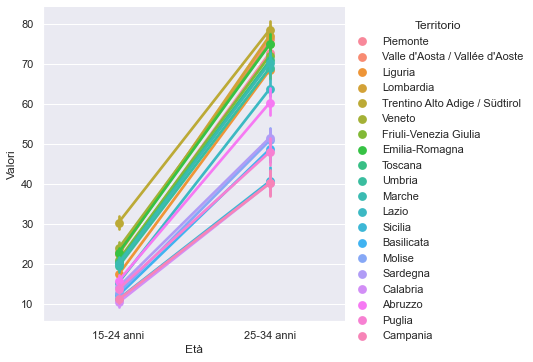

In [25]:
sns.catplot(x="Età", y="Valori", hue="Territorio", kind="point",linewidth= 0.2, data=primo_data)

C:\Users\Alice\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Alice\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


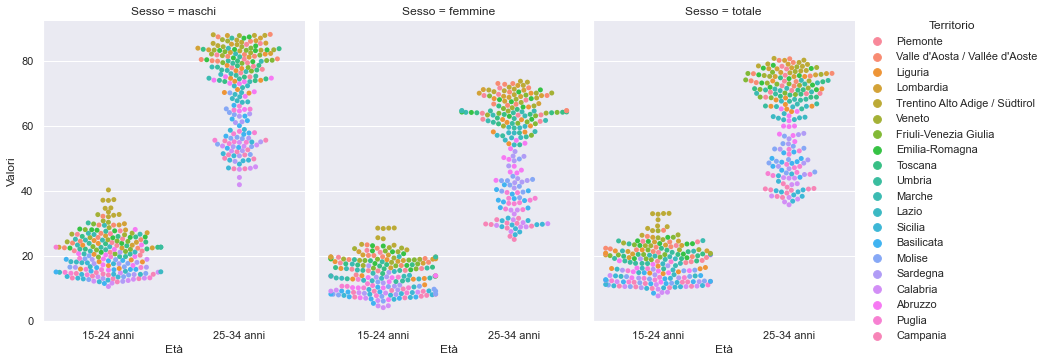

In [26]:
sns.catplot(x="Età", y="Valori", hue="Territorio",
            col="Sesso", aspect=.8,
            kind="swarm", data=primo_data)

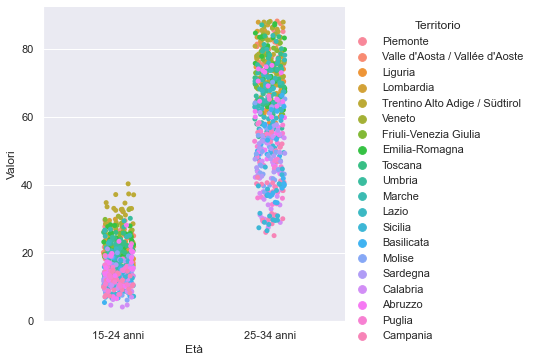

In [27]:
tips = sns.load_dataset("tips")
sns.catplot(x="Età", y="Valori", hue="Territorio", data=primo_data)

C:\Users\Alice\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 37.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


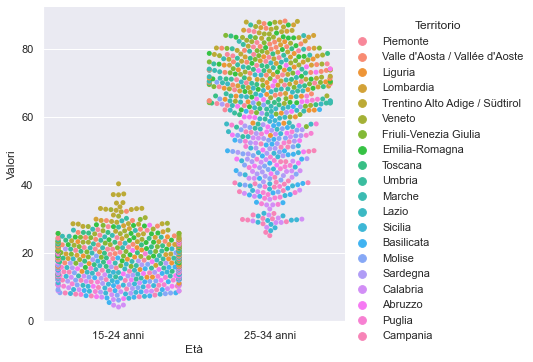

In [28]:
sns.catplot(x="Età", y="Valori", kind="swarm", hue="Territorio", data=primo_data)

C:\Users\Alice\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Alice\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Alice\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


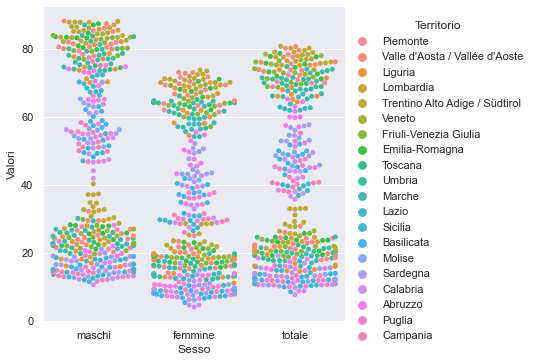

In [81]:
sns.catplot(x="Sesso", y="Valori", hue="Territorio", kind="swarm", data=primo_data)

In [2]:
g = sns.catplot(x="Valori", hue="Territorio", col="Età",
                data=primo_data, kind="count",
                height=4, aspect=.7);

NameError: name 'sns' is not defined

In [86]:
ax = sns.stripplot(x="Territorio", y="Valori", data=prmo_data)

NameError: name 'prmo_data' is not defined